### 01. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 02. Load the California housing dataset

In [2]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
y = pd.Series(housing_data.target, name='median_house_value')

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: median_house_value, Length: 20640, dtype: float64

In [6]:
X.shape

(20640, 8)

In [7]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
# Target variable analysis (values in hundreds of thousands of dollars)
print(f"\nTarget Variable Statistics:")
print(f"  Mean house value: ${y.mean()*100:.0f}k")
print(f"  Median house value: ${np.median(y)*100:.0f}k")
print(f"  Min house value: ${y.min()*100:.0f}k")
print(f"  Max house value: ${y.max()*100:.0f}k")
print(f"  Standard deviation: ${y.std()*100:.0f}k")


Target Variable Statistics:
  Mean house value: $207k
  Median house value: $180k
  Min house value: $15k
  Max house value: $500k
  Standard deviation: $115k


In [9]:
# Feature statistics
print(f"\nFeature Statistics:")
print(X.describe().round(2))


Feature Statistics:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  
count  20640.00   20640.00  
mean      35.63    -119.57  
std        2.14       2.00  
min       32.54    -124.35  
25%       33.93    -121.80  
50%       34.26    -118.49  
75%       37.71    -118.01  
max       41.95    -114.31  


In [10]:
# Check for missing values
print(f"\nMissing values: {X.isnull().sum()}")


Missing values: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


### 03. Data visualizations

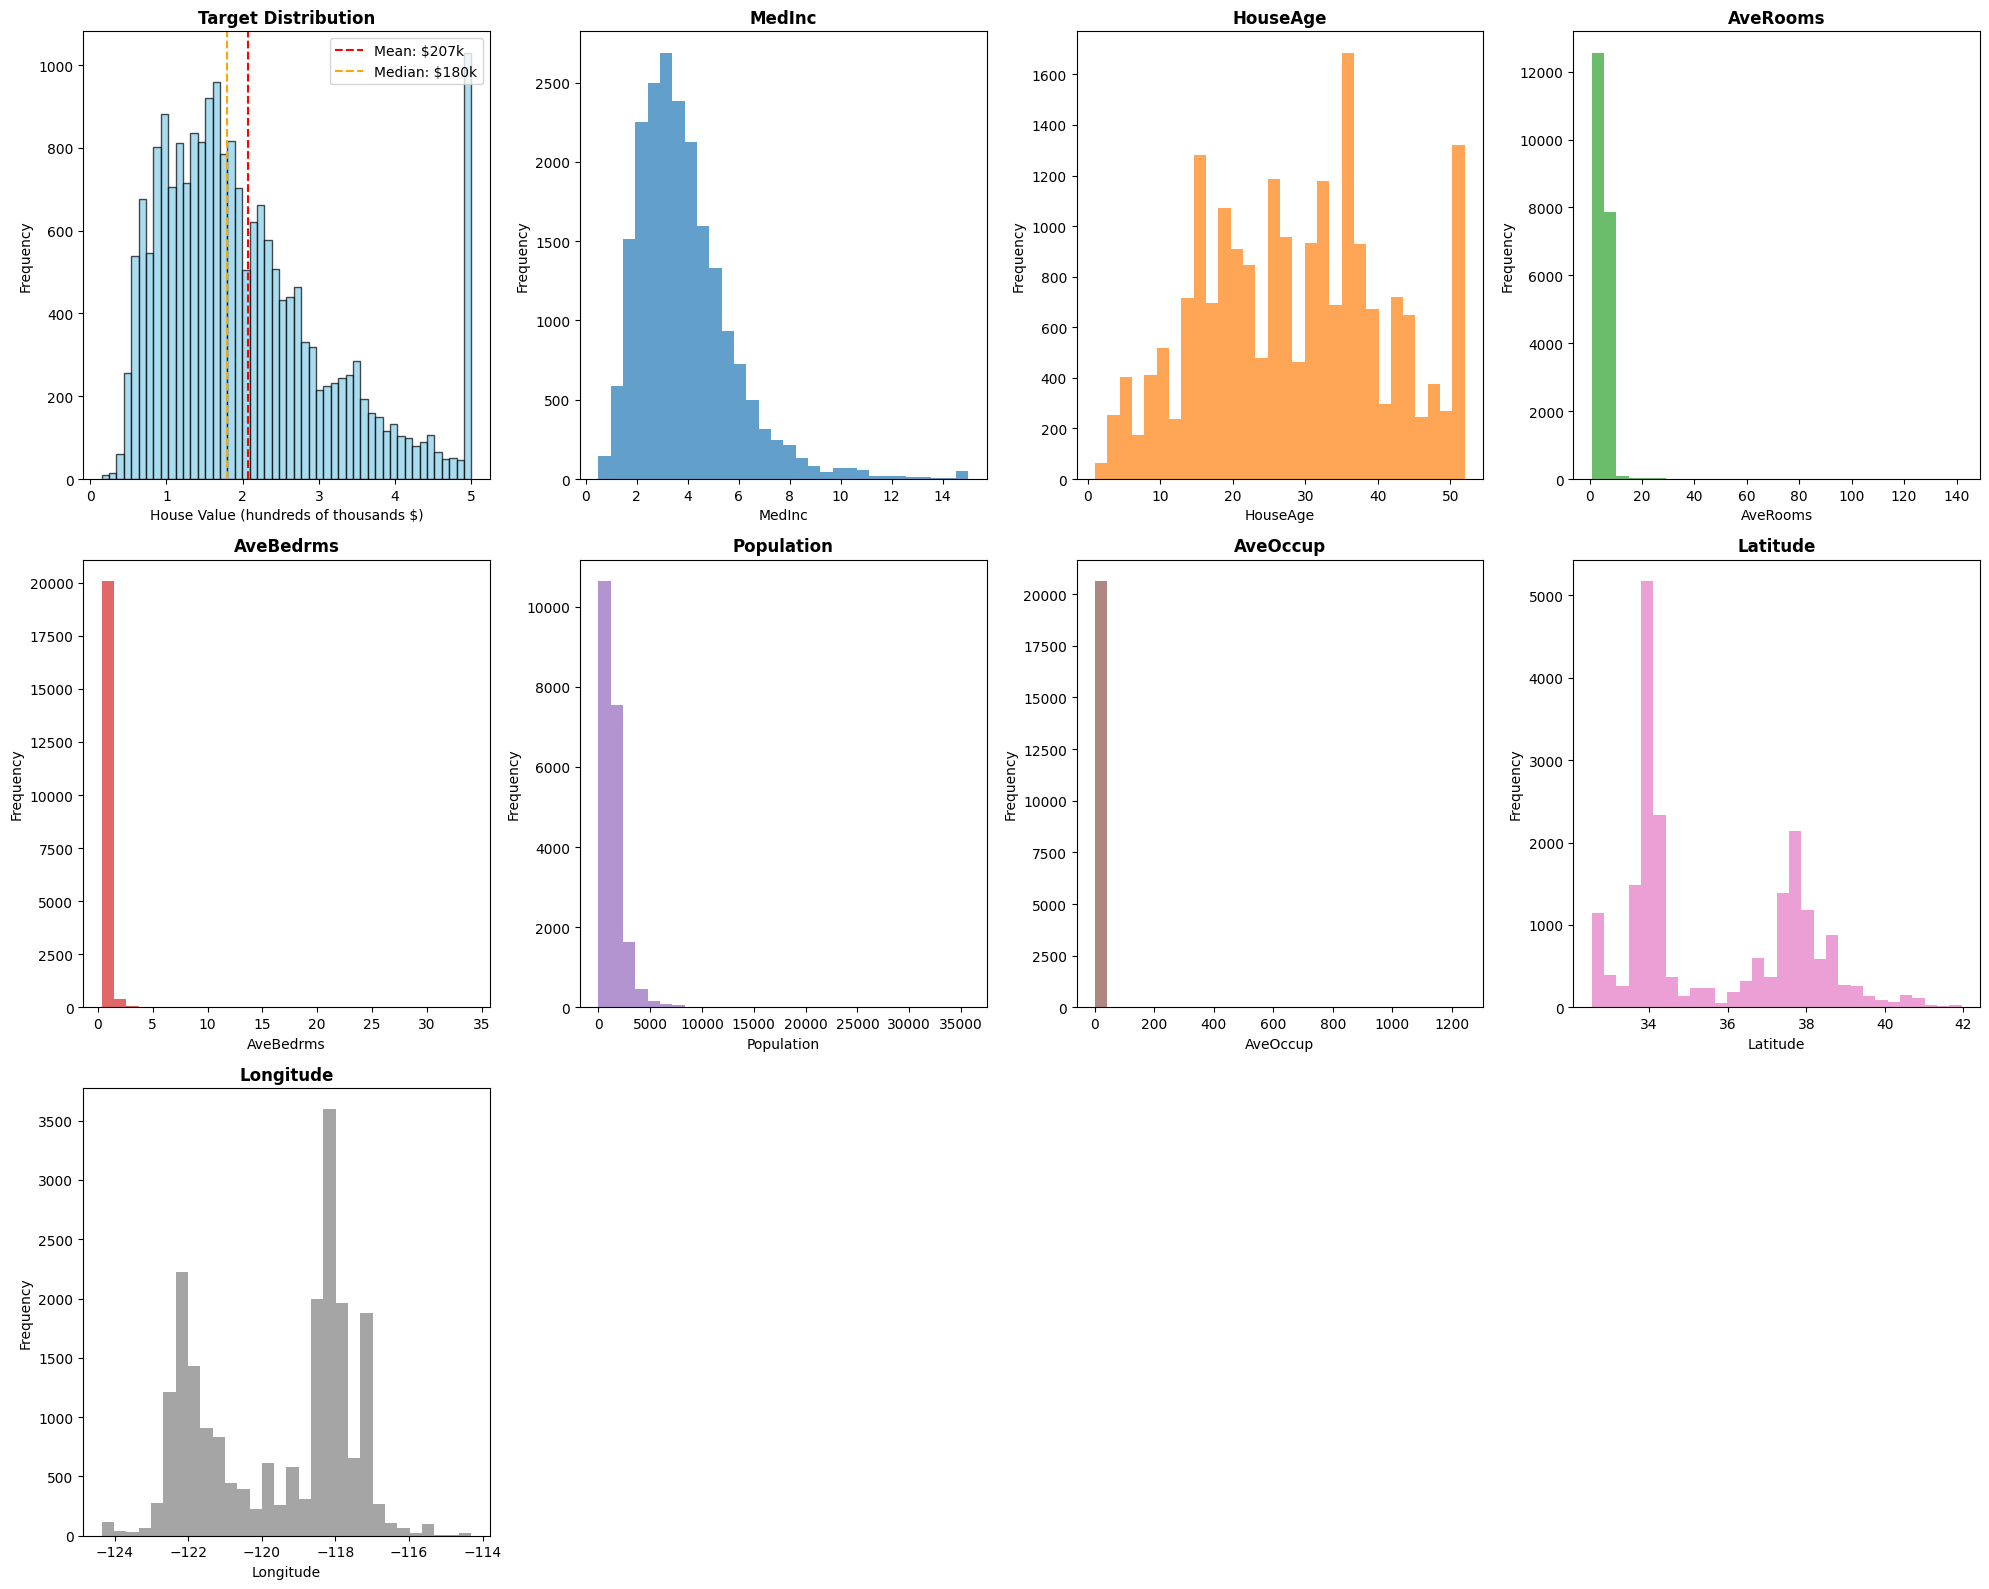

In [11]:
fig = plt.figure(figsize=(20, 16))

# Target distribution
plt.subplot(3, 4, 1)
plt.hist(y, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('House Value (hundreds of thousands $)')
plt.ylabel('Frequency')
plt.title('Target Distribution', fontweight='bold')
plt.axvline(y.mean(), color='red', linestyle='--', label=f'Mean: ${y.mean()*100:.0f}k')
plt.axvline(np.median(y), color='orange', linestyle='--', label=f'Median: ${np.median(y)*100:.0f}k')
plt.legend()

# Feature distributions
for i, feature in enumerate(housing_data.feature_names):
    plt.subplot(3, 4, i+2)
    plt.hist(X[feature], bins=30, alpha=0.7, color=plt.cm.tab10(i))
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature}', fontweight='bold')

plt.tight_layout()
plt.show()

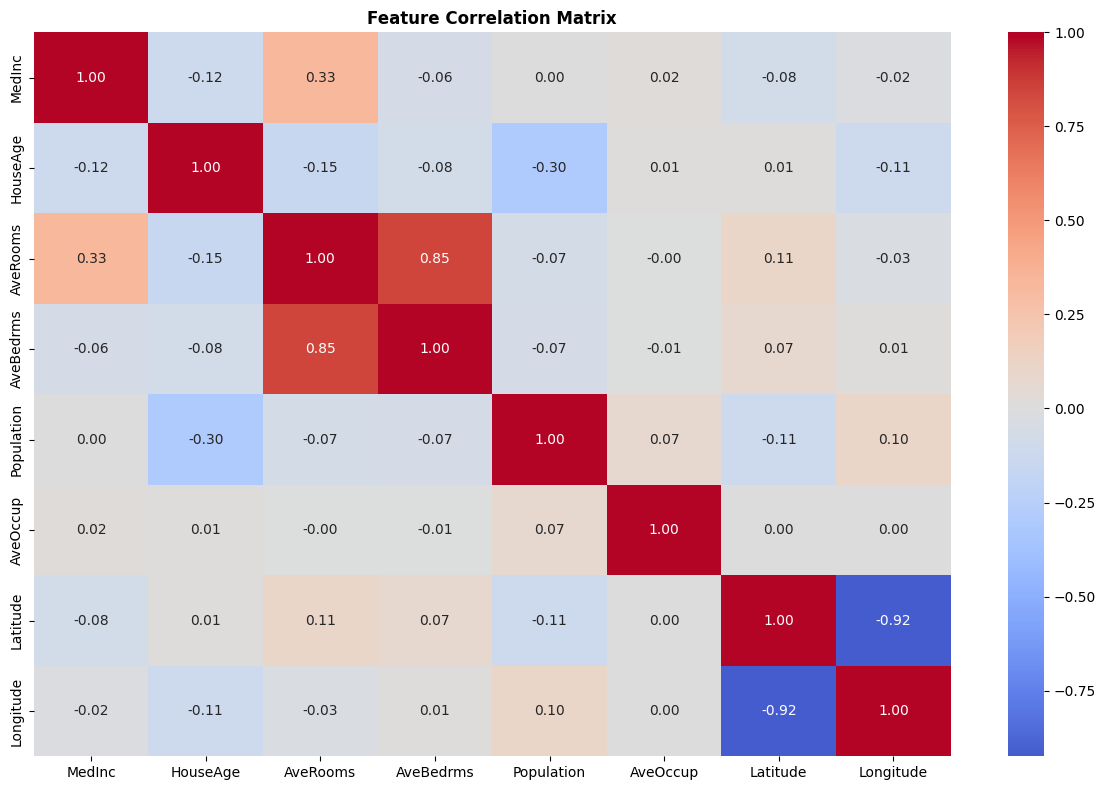

In [12]:
# Correlation analysis
plt.figure(figsize=(12,8))

# Feature correlation heatmap
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Subset of dataset for Hyperparameter Tuning
X_small = X_train_scaled[:2000]
y_small = y_train[:2000]

In [17]:
from sklearn.model_selection import  GridSearchCV

param_grid = {
    "kernel": ["rbf", "linear"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.1, 1]
}

In [18]:
from sklearn.svm import SVR

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=3,
                           scoring="neg_mean_squared_error",
                           verbose=2, n_jobs=-1)

In [19]:
grid_search.fit(X_small, y_small)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [20]:
from sklearn.metrics import mean_squared_error

In [22]:
best_model = grid_search.best_estimator_
print(best_model)

SVR(C=10, gamma='auto')


In [23]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0.56871595, 1.46818997, 3.04487279, ..., 4.64524476, 0.6560499 ,
       1.85762892], shape=(4128,))

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", rmse)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best RMSE: 0.6105974177447734
